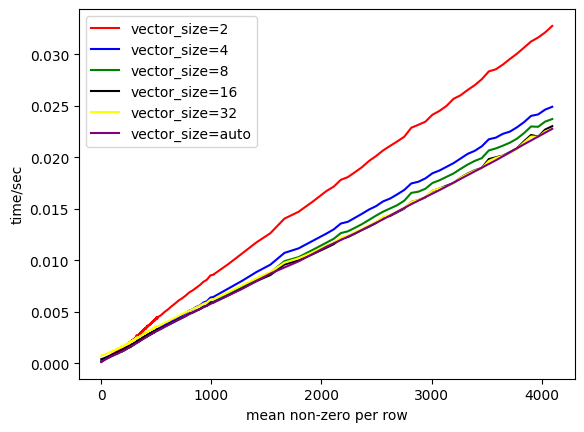

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def fetch(path, n):
    f = open(path, 'r')
    # skip title
    for i in range(14):
        line = f.readline()
    # fetch data
    mean = [[],[],[],[],[]]
    data = [[],[],[],[],[]]
    for i in range(n):
        for j in range(5):
            line = f.readline()
            data[j].append(float(line.split(" ")[7]))
            mean[j].append(int(line.split(" ")[5][:-1]))
    return mean, data

def conc_data(mean1, data1, mean2, data2):
    mean1[0].extend(mean2[0])
    mean1[1].extend(mean2[1])
    mean1[2].extend(mean2[2])
    mean1[3].extend(mean2[3])
    mean1[4].extend(mean2[4])
    data1[0].extend(data2[0])
    data1[1].extend(data2[1])
    data1[2].extend(data2[2])
    data1[3].extend(data2[3])
    data1[4].extend(data2[4])
    return mean1, data1

mean, data = fetch('./experment_data/data1.txt', 256)
m, d = fetch('./experment_data/data3.txt', 256)
mean, data = conc_data(mean, data, m, d)
m, d = fetch('./experment_data/data2.txt', 17)
mean, data = conc_data(mean, data, m, d)
m, d = fetch('./experment_data/data4.txt', 8)
mean, data = conc_data(mean, data, m, d)
m, d = fetch('./experment_data/data6.txt', 33)
mean, data = conc_data(mean, data, m, d)

def fetch2(path, n):
    f = open(path, 'r')
    # skip title
    for i in range(14):
        line = f.readline()
    # fetch data
    mean = []
    data = []
    while(1):
        line = f.readline()
        if(line == '\n'):
            break
        data.append(float(line.split(" ")[7]))
        mean.append(int(line.split(" ")[5][:-1]))
    return mean, data

mean1, data1 = fetch2('./experment_data/data7.txt', 64)

# plt.scatter(mean[0], data[0], c="red",    s=1, label="vector_size=2")
# plt.scatter(mean[1], data[1], c="blue",   s=1, label="vector_size=4")
# plt.scatter(mean[2], data[2], c="green",  s=1, label="vector_size=8")
# plt.scatter(mean[3], data[3], c="black",  s=1, label="vector_size=16")
# plt.scatter(mean[4], data[4], c="yellow", s=1, label="vector_size=32")
# plt.legend(loc='best')
# plt.show()

plt.plot(mean[0], data[0], c="red", label="vector_size=2")
plt.plot(mean[1], data[1], c="blue", label="vector_size=4")
plt.plot(mean[2], data[2], c="green", label="vector_size=8")
plt.plot(mean[3], data[3], c="black", label="vector_size=16")
plt.plot(mean[4], data[4], c="yellow", label="vector_size=32")
plt.plot(mean1, data1, c="purple", label="vector_size=auto")
plt.legend(loc='best')
plt.ylabel('time/sec')
plt.xlabel('mean non-zero per row')
plt.show()

LightSpMV mean gflops =  2.6944158046874973
Merge-based mean gflops =  1.3693267382812502
性能提升倍数 =  1.967693852286468


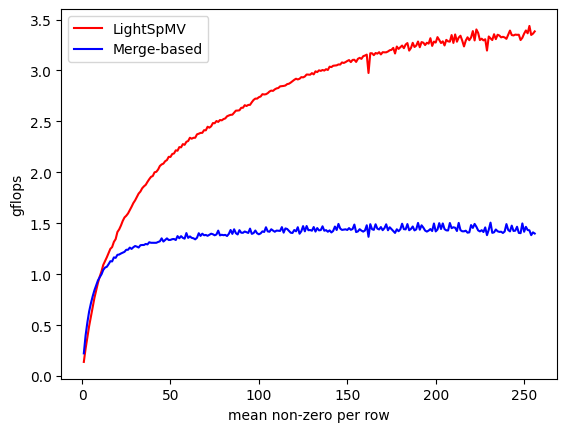

In [6]:
import matplotlib.pyplot as plt
import numpy as np


def fetch(path):
    f = open(path, 'r')
    # skip title
    for i in range(14):
        line = f.readline()
    # fetch data
    mean = [[],[]]
    data = [[],[]]
    gflops = [[],[]]
    while(1):
        for j in range(2):
            line = f.readline()
            if(line == '\n'):
                break
            data[j].append(float(line.split(" ")[7]))
            mean[j].append(int(line.split(" ")[5][:-1]))
            gflops[j].append(float(line.split(" ")[10]))
        if(line == '\n'):
                break
    return mean, data, gflops


mean, data, gflops = fetch('./experment_data/data8.txt')

print("LightSpMV mean gflops = ", sum(gflops[0]) / 256)
print("Merge-based mean gflops = ", sum(gflops[1]) / 256)
print("性能提升倍数 = ", sum(gflops[0]) / sum(gflops[1]))

# plt.scatter(mean[0], gflops[0], c="red",  s=1, label="LightSpMV")
# plt.scatter(mean[1], gflops[1], c="blue", s=1, label="Merge-based")

plt.plot(mean[0], gflops[0], c="red",  label="LightSpMV")
plt.plot(mean[1], gflops[1], c="blue", label="Merge-based")

plt.ylabel('gflops')
plt.xlabel('mean non-zero per row')
plt.legend(loc='best')
plt.show()